In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%time df = pd.read_pickle("../data/train67_test.pickle")

Wall time: 4.79 s


In [3]:
train = df[df['pt_d']==6]
val = df[df['pt_d']==7]

test = df[df['label'].isna()]

In [15]:
# df = df.sort_values(['uid'])
df.head()

,label,uid,task_id,adv_id,creat_type_cd,adv_prim_id,dev_id,inter_type_cd,slot_id,spread_app_id,...,list_time,device_price,up_life_duration,up_membership_grade,membership_life_duration,consume_purchase,communication_onlinerate,communication_avgonline_30d,indu_name,pt_d
0,0.0,2162947,5936,2934,6,126,19,5,18,57,...,10,2,20,1,-1,2,8^9^10^11^12^13^14^15^16^17^18^19^20^21^22^23,9,46,6
1,0.0,1802604,4189,6509,7,122,18,5,16,56,...,14,5,20,1,-1,2,2^3^4^5^6^7^8^9^10^11^12^13^14^15^16^17^18^19^...,13,14,6
2,0.0,2221433,1689,2069,3,142,36,5,12,80,...,15,4,18,-1,-1,2,11^12^13^14^15^16^17^18^19^20^21^22^23,7,42,6
3,1.0,2100689,2926,4168,3,142,36,5,12,80,...,13,2,18,-1,-1,5,0^1^2^3^4^5^6^7^8^9^10^11^12^13^14^15^16^17^18...,12,42,6
4,0.0,2101862,1086,1219,5,142,36,5,18,80,...,15,4,16,-1,-1,2,0^1^2^3^4^5^6^7^8^9^10^11^12^13^14^15^16^17^18...,13,42,6


In [22]:
len(train),len(test)

(12027161, 1000000)

In [25]:
len(train[train['label']==1]),len(train[train['label']==0])

(421964, 11605197)

# 目标变量分布

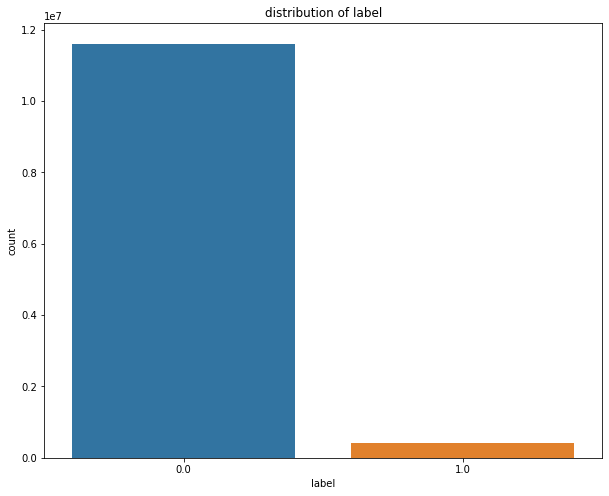

In [5]:
plt.figure(figsize=(10,8))
sns.countplot(train['label'])
plt.title('distribution of label')
plt.show()

In [6]:
# 样本极度不平衡
train['label'].mean()

0.035084256376047514

样本极度不平衡,继续采样，将完全没有点击行为的用户去掉

# nunique

In [7]:
len(train)

12027161

In [12]:
train.isna().sum()

label                          0
uid                            0
task_id                        0
adv_id                         0
creat_type_cd                  0
adv_prim_id                    0
dev_id                         0
inter_type_cd                  0
slot_id                        0
spread_app_id                  0
tags                           0
app_first_class                0
app_second_class               0
age                            0
city                           0
city_rank                      0
device_name                    0
device_size                    0
career                         0
gender                         0
net_type                       0
residence                      0
his_app_size                   0
his_on_shelf_time              0
app_score                      0
emui_dev                       0
list_time                      0
device_price                   0
up_life_duration               0
up_membership_grade            0
membership

In [9]:
df.nunique()

label                               2
uid                            911825
task_id                          2765
adv_id                           3643
creat_type_cd                       8
adv_prim_id                        91
dev_id                             44
inter_type_cd                       4
slot_id                            12
spread_app_id                      60
tags                               22
app_first_class                     3
app_second_class                   17
age                                 8
city                              344
city_rank                           4
device_name                        89
device_size                       187
career                              9
gender                              3
net_type                            5
residence                          36
his_app_size                       21
his_on_shelf_time                   3
app_score                           2
emui_dev                           16
list_time   

# 测试和训练的分布

In [4]:
for i in test.columns:
    trn_ = set(train[i].unique())
    tst_ = set(test[i].unique()) 
    print(i,len(trn_),len(tst_),1.0*len(trn_&tst_)/len(tst_))

label 2 1 0.0
uid 627596 410246 0.6556773253121297
task_id 2171 2096 0.8115458015267175
adv_id 2949 2615 0.8347992351816443
creat_type_cd 8 8 1.0
adv_prim_id 79 85 0.8705882352941177
dev_id 42 39 0.9743589743589743
inter_type_cd 4 4 1.0
slot_id 12 12 1.0
spread_app_id 52 53 0.8867924528301887
tags 22 19 1.0
app_first_class 3 3 1.0
app_second_class 17 16 1.0
age 8 8 1.0
city 344 344 1.0
city_rank 4 4 1.0
device_name 86 89 0.9662921348314607
device_size 162 142 0.9436619718309859
career 9 9 1.0
gender 3 3 1.0
net_type 5 5 1.0
residence 36 36 1.0
his_app_size 21 21 1.0
his_on_shelf_time 3 3 1.0
app_score 2 2 1.0
emui_dev 16 16 1.0
list_time 16 16 1.0
device_price 7 7 1.0
up_life_duration 21 21 1.0
up_membership_grade 4 4 1.0
membership_life_duration 14 13 0.6153846153846154
consume_purchase 9 9 1.0
communication_onlinerate 1178 718 0.5905292479108635
communication_avgonline_30d 14 14 1.0
indu_name 34 33 0.9696969696969697
pt_d 1 1 0.0


In [ ]:
# communication_onlinerate,membership_life_duration差异较大

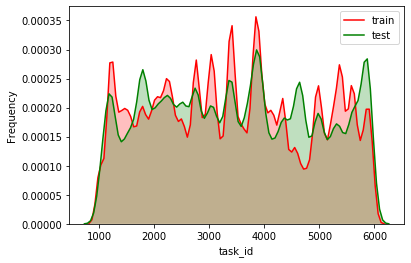

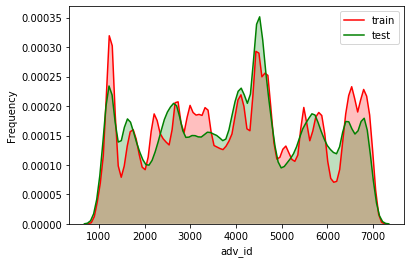

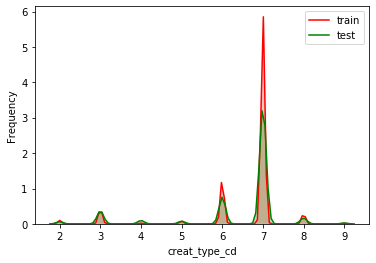

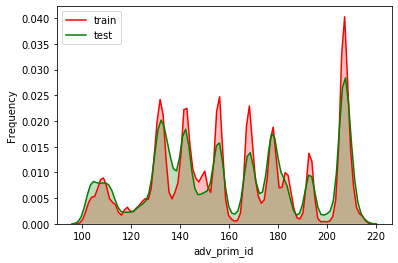

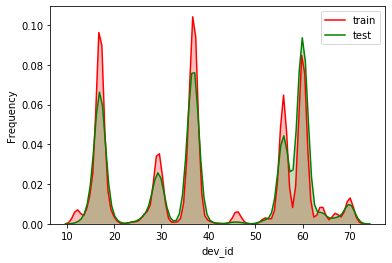

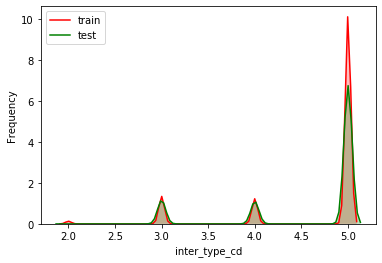

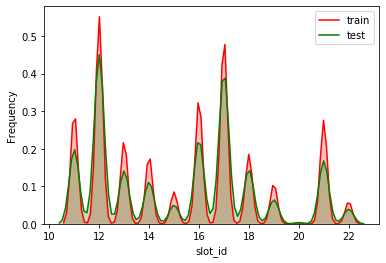

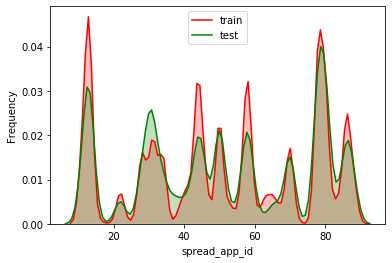

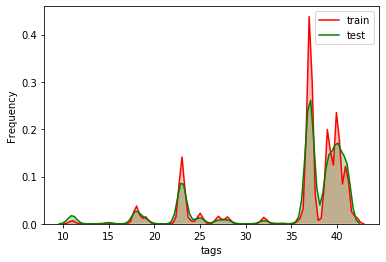

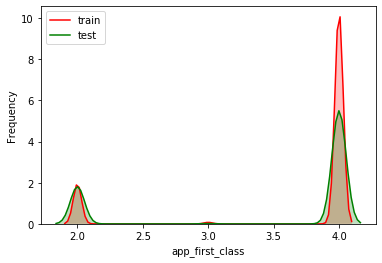

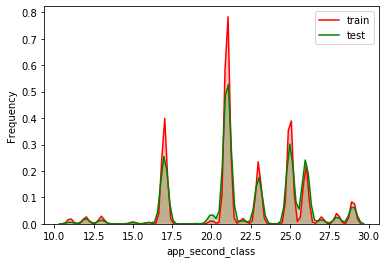

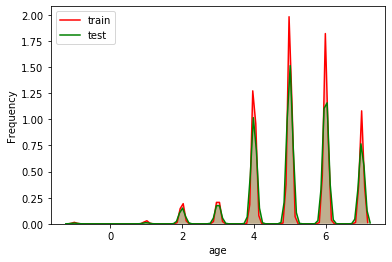

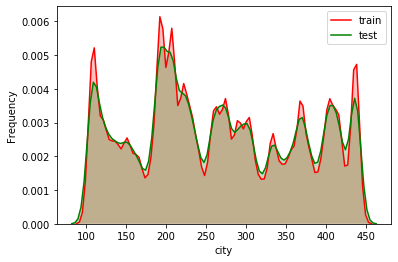

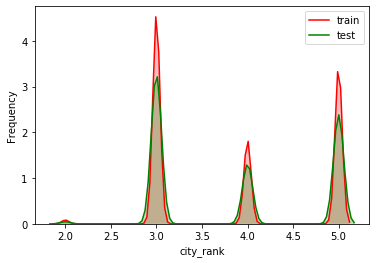

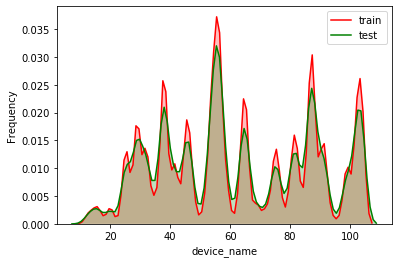

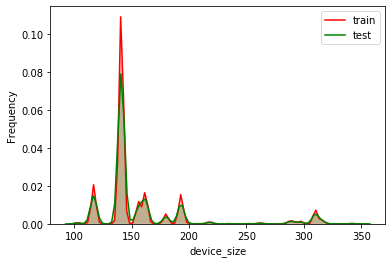

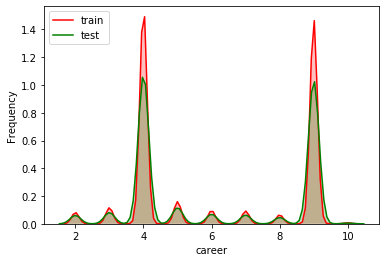

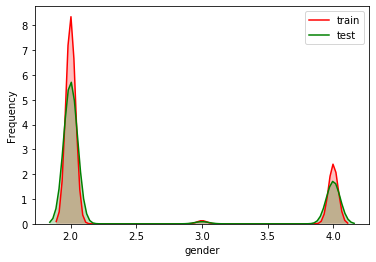

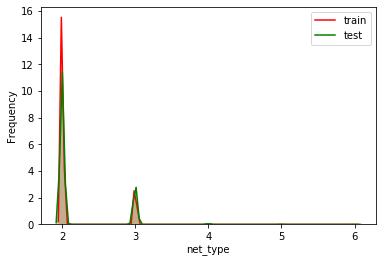

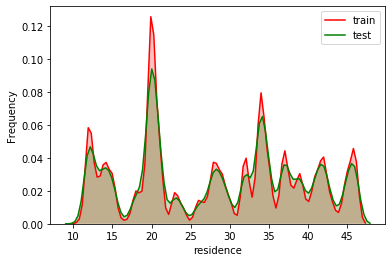

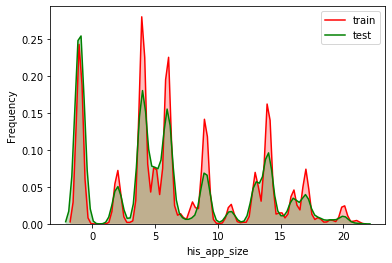

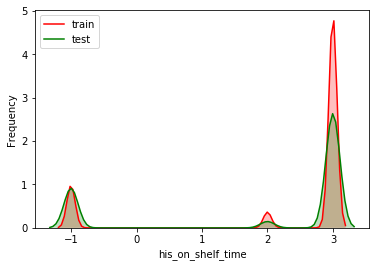

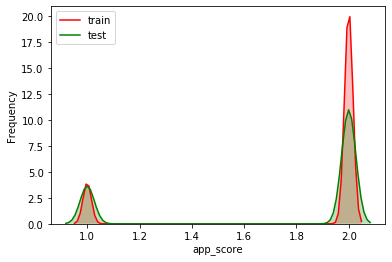

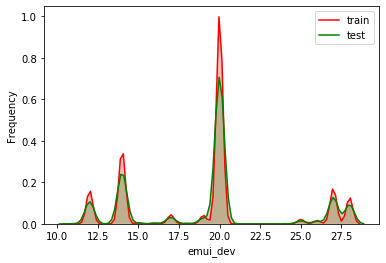

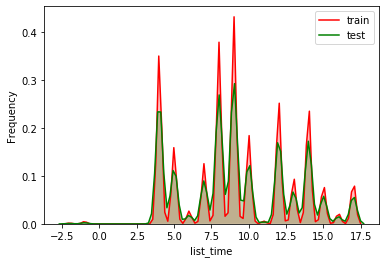

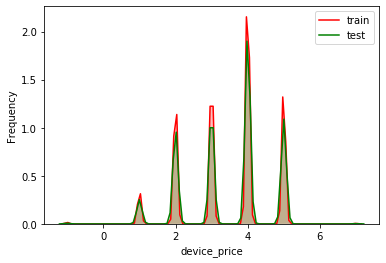

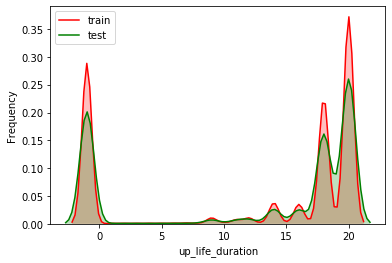

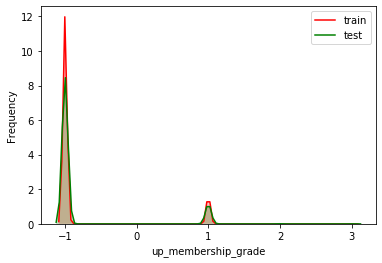

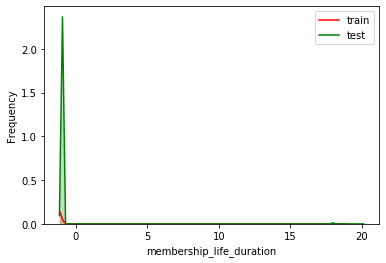

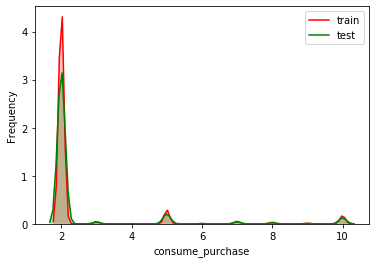

ValueError: could not convert string to float: '6^7^8^9^10^11^12^13^14^15^16^17^18^19^20^21^22^23'

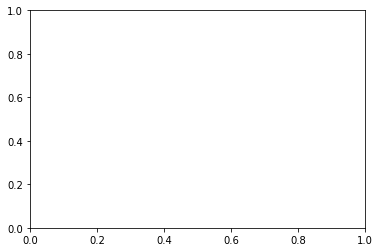

In [5]:
# 查看概率密度分布，必须先填充缺失值。
cols = [i for i in train.columns if (i!='uid' and i!='label' and i!= 'communication_onlinerate ')]
for i in cols:
    g = sns.kdeplot(train[i],color='Red',shade=True)
    g = sns.kdeplot(test[i],color='Green',shade=True,ax=g)
    g.set_xlabel(i)
    g.set_ylabel('Frequency')
    g = g.legend(['train','test'])
    plt.show()

# 单变量分析


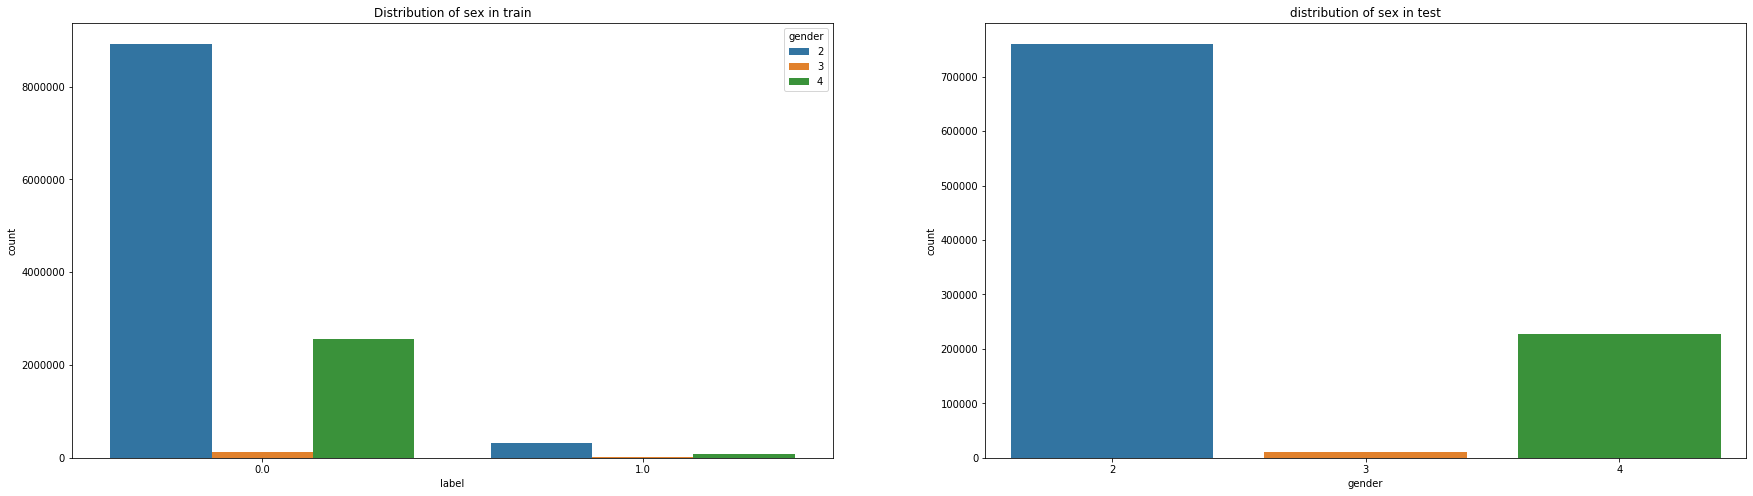

In [24]:
# 性别，年龄
plt.figure(figsize=(30,8))
plt.subplot(1,2,1)
sns.countplot(x='label',hue='gender',data=train)
plt.title('Distribution of sex in train')

plt.subplot(1,2,2)
sns.countplot(x='gender',data=test)
plt.title('distribution of sex in test')
plt.show()

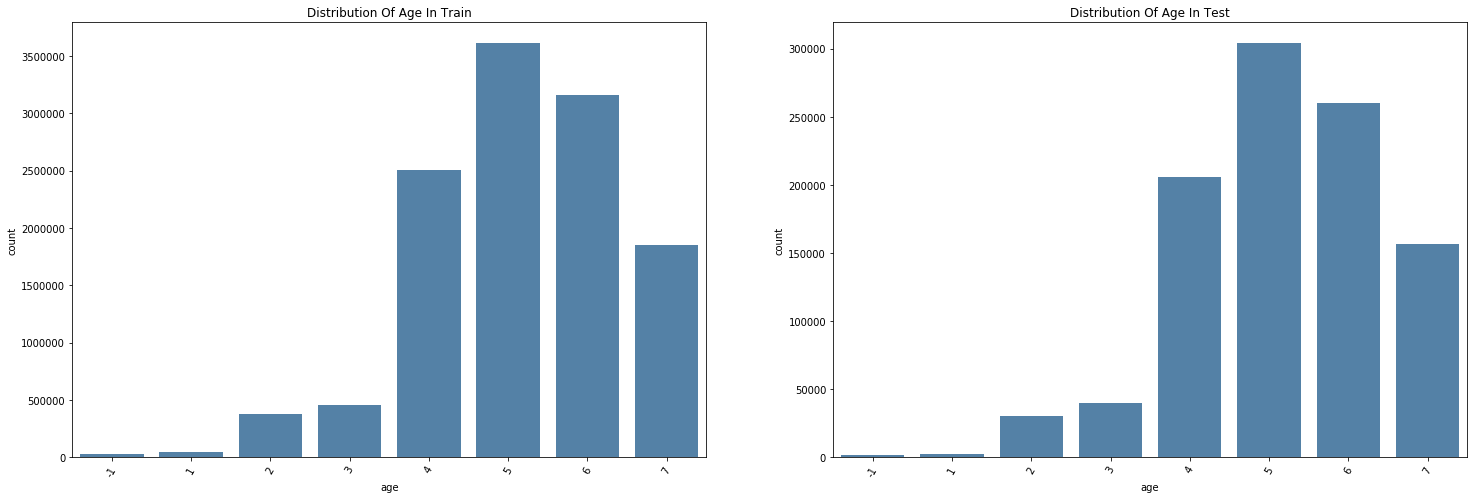

In [26]:
plt.figure(figsize=(25, 8))
plt.subplot(1,2,1)
sns.countplot(x='age', data=train, color='steelblue')
plt.title('Distribution Of Age In Train')
plt.xticks(rotation=60)
plt.subplot(1,2,2)
sns.countplot(x='age', data=test, color='steelblue')
plt.title('Distribution Of Age In Test')
plt.xticks(rotation=60)
plt.show()

Text(0.5, 1.0, 'ctr of different age')

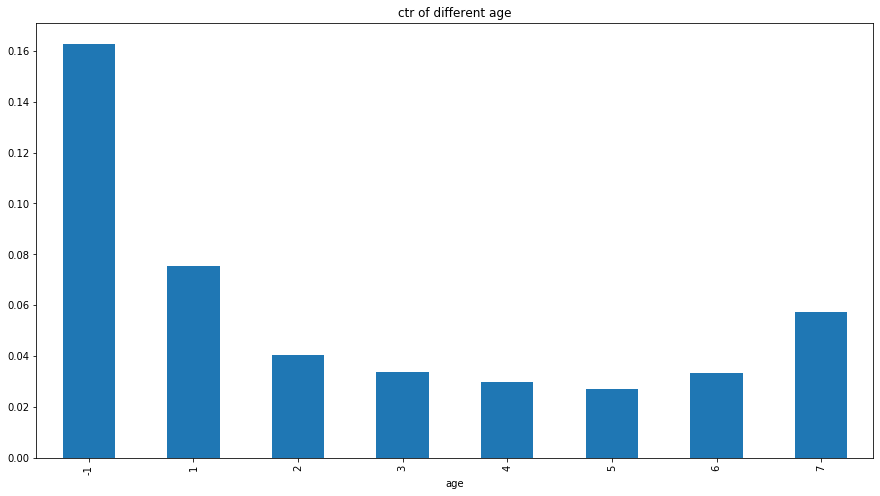

In [28]:
plt.figure(figsize=(15,8))
train.groupby(['age'])['label'].mean().plot.bar()
plt.title('ctr of different age')

Text(0.5, 1.0, 'ctr of different age')

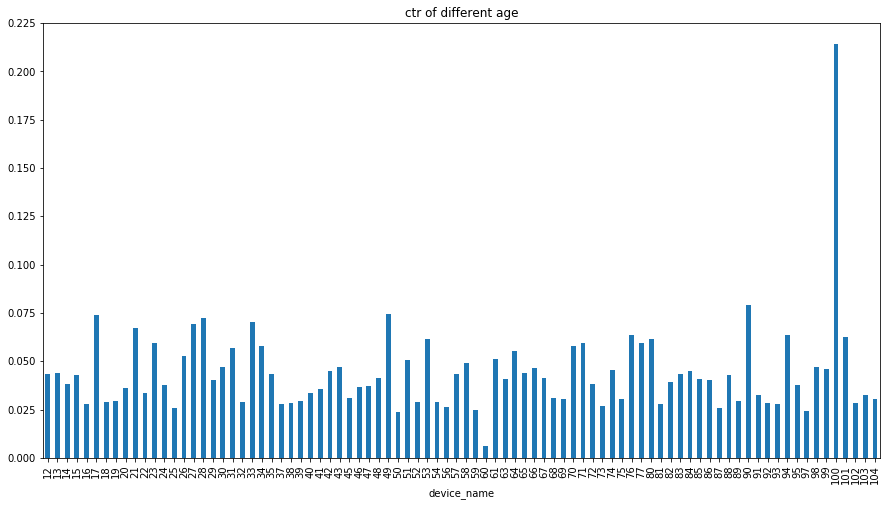

In [29]:
plt.figure(figsize=(15,8))
train.groupby(['device_name'])['label'].mean().plot.bar()
plt.title('ctr of different age')

Text(0.5, 1.0, 'ctr of different communication_avgonline_30d')

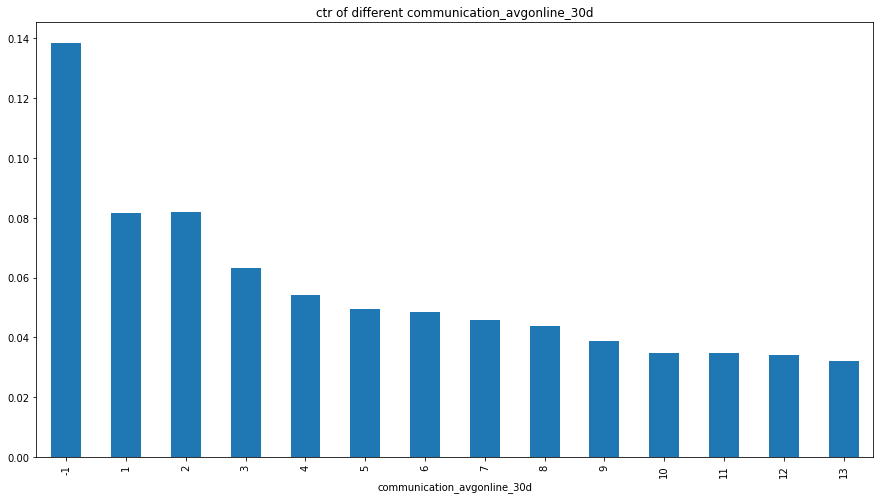

In [20]:
plt.figure(figsize=(15,8))
train.groupby(['communication_avgonline_30d'])['label'].mean().plot.bar()
plt.title('ctr of different communication_avgonline_30d')

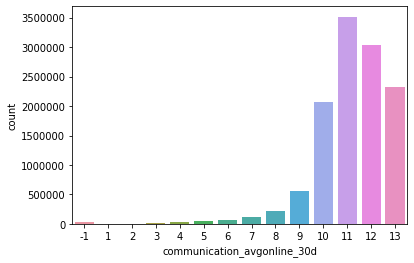

In [21]:
sns.countplot(x='communication_avgonline_30d',data=train)

Text(0.5, 1.0, 'ctr of different indu_name')

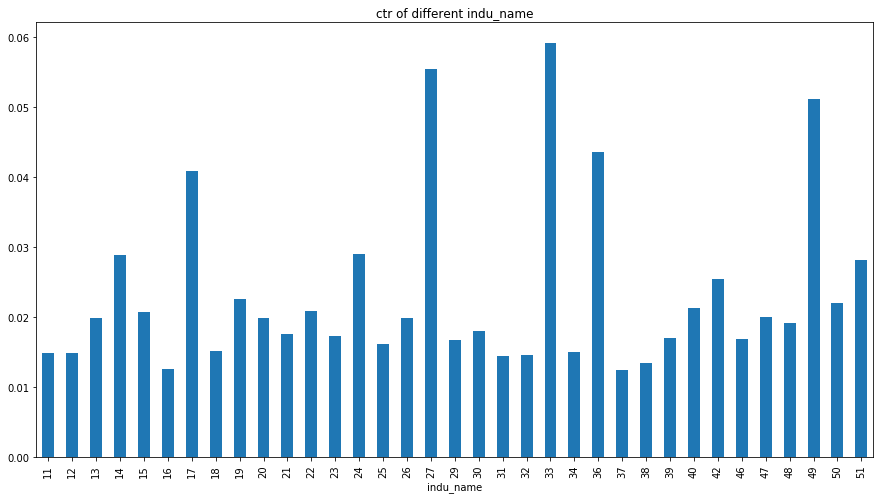

In [16]:
plt.figure(figsize=(15,8))
train.groupby(['indu_name'])['label'].mean().plot.bar()
plt.title('ctr of different indu_name')

基于此可以做目标编码

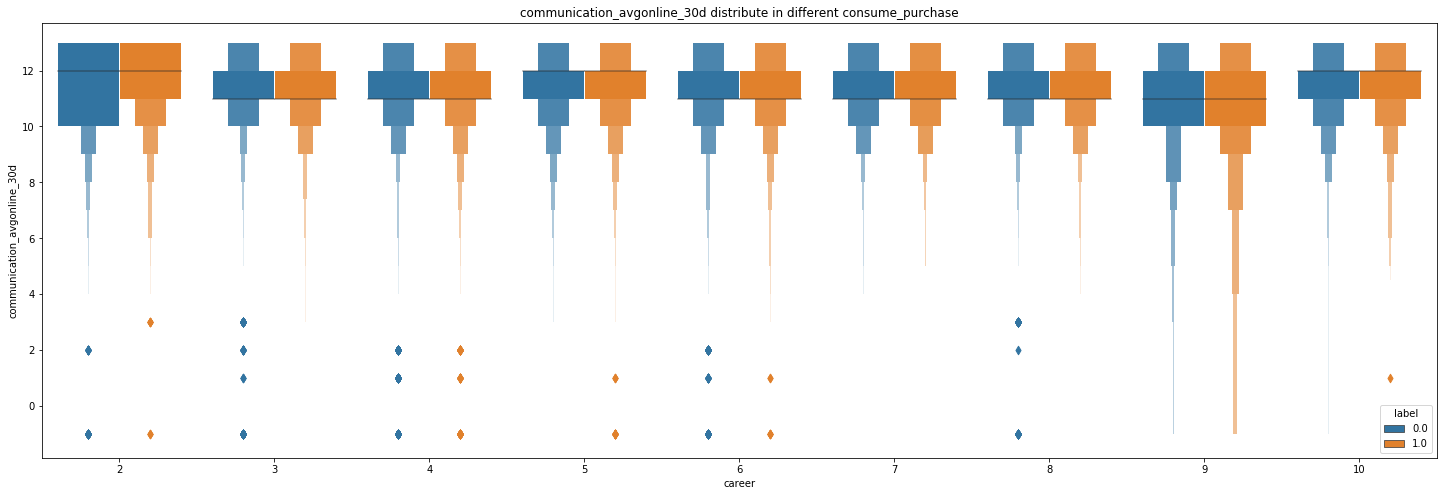

In [19]:
# 不同的广告行业的手机每日活动时间
plt.figure(figsize=(25,8))
sns.boxenplot(x='career',y='communication_avgonline_30d',hue='label',data=train)
plt.title('communication_avgonline_30d distribute in different consume_purchase')
plt.show()

In [ ]:
# 发生行为的用户的手机每日活动时间
# 发生行为的用户的付费用户标签

# 按照id 采样

In [24]:
train.shape

(6009176, 36)

In [10]:
ids = val['uid']
tmp = train[(train['uid'].isin(ids))]

In [11]:
tmp.shape

(5284800, 36)

In [28]:
for i in test.columns:
    trn_ = set(tmp[i].unique())
    tst_ = set(test[i].unique()) 
    print(i,len(trn_),len(tst_),1.0*len(trn_&tst_)/len(tst_))

label 2 1 0.0
uid 267502 410246 0.6520526708365225
task_id 2137 2096 0.7719465648854962
adv_id 2893 2615 0.7980879541108986
creat_type_cd 8 8 1.0
adv_prim_id 82 85 0.9058823529411765
dev_id 42 39 0.9487179487179487
inter_type_cd 4 4 1.0
slot_id 12 12 1.0
spread_app_id 54 53 0.9056603773584906
tags 22 19 1.0
app_first_class 3 3 1.0
app_second_class 17 16 1.0
age 8 8 1.0
city 343 344 0.997093023255814
city_rank 4 4 1.0
device_name 86 89 0.9662921348314607
device_size 146 142 0.9225352112676056
career 9 9 1.0
gender 3 3 1.0
net_type 5 5 1.0
residence 35 36 0.9722222222222222
his_app_size 21 21 1.0
his_on_shelf_time 3 3 1.0
app_score 2 2 1.0
emui_dev 16 16 1.0
list_time 16 16 1.0
device_price 7 7 1.0
up_life_duration 21 21 1.0
up_membership_grade 4 4 1.0
membership_life_duration 9 13 0.5384615384615384
consume_purchase 9 9 1.0
communication_onlinerate 497 718 0.4331476323119777
communication_avgonline_30d 14 14 1.0
indu_name 34 33 0.9696969696969697
pt_d 1 1 0.0
